In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np

In [16]:
# Read the data
data = pd.read_csv("./CustomerChurn.csv")

In [4]:
# Data cleaning
'''
data.INCOME_RANGE = pd.Categorical(data.INCOME_RANGE)
data.HH_SIZE = pd.Categorical(data.HH_SIZE)
data.MARITAL = pd.Categorical(data.MARITAL)
data.LOYALTY_FLAG = pd.Categorical(data.LOYALTY_FLAG)
data['INCOME_RANGE'] = data.INCOME_RANGE.cat.codes
data['HH_SIZE'] = data.HH_SIZE.cat.codes
data['MARITAL'] = data.MARITAL.cat.codes
data['LOYALTY_FLAG'] = data.LOYALTY_FLAG.cat.codes
data['TOTAL_SPEND'] = data.TOTAL_SPEND.astype('int')

data.to_csv(r'./CustomerChurn.csv', index = False)
'''


"\ndata.INCOME_RANGE = pd.Categorical(data.INCOME_RANGE)\ndata.HH_SIZE = pd.Categorical(data.HH_SIZE)\ndata.MARITAL = pd.Categorical(data.MARITAL)\ndata.LOYALTY_FLAG = pd.Categorical(data.LOYALTY_FLAG)\ndata['INCOME_RANGE'] = data.INCOME_RANGE.cat.codes\ndata['HH_SIZE'] = data.HH_SIZE.cat.codes\ndata['MARITAL'] = data.MARITAL.cat.codes\ndata['LOYALTY_FLAG'] = data.LOYALTY_FLAG.cat.codes\ndata['TOTAL_SPEND'] = data.TOTAL_SPEND.astype('int')\n\ndata.to_csv(r'./CustomerChurn.csv', index = False)\n"

In [15]:
# Display first five rows
data.head()

,TOTAL_SPEND,MARITAL,HH_SIZE,INCOME_RANGE,LOYALTY_FLAG
0,89,1,0,2,1
1,94,0,2,3,1
2,79,0,1,5,1
3,292,0,4,2,1
4,150,0,2,4,1


<AxesSubplot:>

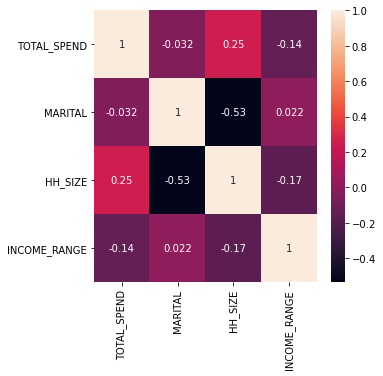

In [29]:
# plotting correlation of features with respect to label
plt.figure(figsize=(5,5))
sns.heatmap(data.drop('LOYALTY_FLAG', axis=1).corr(), annot=True)

In [5]:
# seperating features and label
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [6]:
# Check for each class count
print("DATASET DISTRIBUTION:\nNumber of instances in class 0 or 'unloyal' :", y.value_counts()[0])
print("Number of instances in class 1 or 'loyal' :", y.value_counts()[1])

DATASET DISTRIBUTION:
Number of instances in class 0 or 'unloyal' : 71
Number of instances in class 1 or 'loyal' : 197


In [7]:
#split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [8]:
# Define the model
model = LogisticRegression(max_iter = 1000)

# Train the model
model.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Model parameters
print('\nMODEL PARAMETERS: \nweights: ', model.coef_)
print('bias: ', model.intercept_)


MODEL PARAMETERS: 
weights:  [[ 0.01418876 -0.34609983  0.14408751  0.02292672]]
bias:  [-0.3975337]


In [10]:
# Test the model
predictions = model.predict(X_test)

In [11]:
# Check accuracy score
score = model.score(X_test, y_test)
print(f"\nAccuracy: {score}")


Accuracy: 0.7407407407407407


In [12]:
# print confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))

Confusion Matrix:
 [[ 3 11]
 [ 3 37]]


In [14]:
# print classification summary
target_names = ['class 0', 'class 1']
print('Classification report:\n',classification_report(y_test, predictions, target_names=target_names))

Classification report:
               precision    recall  f1-score   support

     class 0       0.50      0.21      0.30        14
     class 1       0.77      0.93      0.84        40

    accuracy                           0.74        54
   macro avg       0.64      0.57      0.57        54
weighted avg       0.70      0.74      0.70        54

